In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/jahyeon_gu/nltk_data...
[nltk_data]    |   Unzippin

True

In [2]:
# train 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fbef717cc10>)

In [2]:
# 훈련 데이터 전처리
targetXML = open('../../data/ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [3]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print(f'총 샘플의 개수 : {len(result)}')

총 샘플의 개수 : 273424


In [5]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Word2Vec 훈련
* Word2Vec의 하이퍼파라미터
  * vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
  * window = 컨텍스트 윈도우 크기
  * min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
  * workers = 학습을 위한 프로세스 수
  * sg = 0은 CBOW, 1은 Skip-gram.

In [6]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [7]:
# "man"과 가장 유사한 단어들 출력
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8473908305168152), ('guy', 0.8200397491455078), ('lady', 0.7743778824806213), ('boy', 0.7679186463356018), ('girl', 0.7489623427391052), ('gentleman', 0.7233147621154785), ('kid', 0.7042834758758545), ('soldier', 0.6958935260772705), ('poet', 0.6700498461723328), ('friend', 0.6689805388450623)]


## Word2Vec 모델 저장하고 로드하기

In [8]:
# 모델 저장
model.wv.save_word2vec_format("eng_w2v")

# 모델 load
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [9]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8473908305168152), ('guy', 0.8200397491455078), ('lady', 0.7743778824806213), ('boy', 0.7679186463356018), ('girl', 0.7489623427391052), ('gentleman', 0.7233147621154785), ('kid', 0.7042834758758545), ('soldier', 0.6958935260772705), ('poet', 0.6700498461723328), ('friend', 0.6689805388450623)]


## 한국어 Word2Vec 만들기(네이버 영화 리뷰)
konlpy 사용으로 colab에서 진행

In [9]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 47.3 MB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [11]:
# 네아버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fbee543b3a0>)

In [12]:
train_data = pd.read_table('ratings.txt')
print(f"리뷰 개수 : {len(train_data)}")
train_data.head()

리뷰 개수 : 200000


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [13]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [14]:
# 결측치 제거
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [15]:
print(f"결측치 제거 후 리뷰 개수 : {len(train_data)}")

결측치 제거 후 리뷰 개수 : 199992


In [16]:
# 정규 표현식을 활용하여 한글이 아닌 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-16-acb00fdf98fe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [22]:
from tqdm import tqdm
from konlpy.tag import Okt

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    # 토큰화
    tokenized_sentence = okt.morphs(sentence, stem=True)

    # 불용어 제거
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [11:00<00:00, 302.67it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


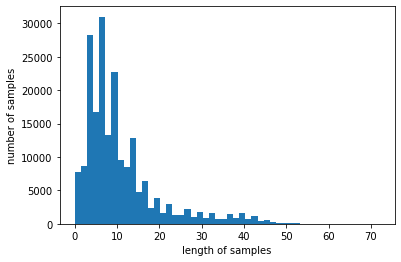

In [23]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
from gensim.models import Word2Vec

# 토큰화된 데이터 학습
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [25]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [26]:
# 히어로와 유사한 단어 출력
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8598375916481018), ('무협', 0.8478937745094299), ('블록버스터', 0.8443288803100586), ('호러', 0.8414063453674316), ('무비', 0.8262678384780884), ('느와르', 0.8206101655960083), ('물의', 0.8095203638076782), ('정통', 0.7997816205024719), ('블랙', 0.7926508188247681), ('멜로', 0.7905600666999817)]
